In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
Xtrain = pd.read_csv("Xtrain.csv").as_matrix()
Ytrain = pd.read_csv("Ytrain.csv").as_matrix()
Xval = pd.read_csv("Xval.csv").as_matrix()
Yval = pd.read_csv("Yval.csv").as_matrix()
Xtest = pd.read_csv("Xtest.csv").as_matrix()
Ytest = pd.read_csv("Ytest.csv").as_matrix()

/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values

In [58]:
def ROC(X,Y,w1,b1,w2,b2):
    threshold = np.linspace(1000,0, 1001)
    threshold = threshold/1000
    tprs = []
    fprs = []
    for i in threshold:
        tprs.append(np.sum(np.multiply((sig(tanh(X@w1 + b1)@w2+b2)>i),Y))/np.sum(Y))
        fprs.append(np.sum(np.multiply((sig(tanh(X@w1 + b1)@w2+b2)>i),1 - Y))/np.sum(1 - Y))
    plt.plot(fprs,tprs)
    plt.plot([0,1],[0,1], c = 'black')
    plt.xlabel("False Positive Rate",fontsize = 14)
    plt.ylabel("True Positive Rate", fontsize = 14)
    plt.title("ROC", fontsize  = 20)
    leg = "AUC = "+str((np.sum(np.multiply(tprs[0:1000],np.diff(fprs)))+np.sum(np.multiply(tprs[1:1001],np.diff(fprs))))/2)
    plt.text(.58,0,leg, fontsize = 14)
    plt.show()
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
def sig(X):
    return 1/(1+np.exp(-X))

In [59]:
trainmaxs = np.max(Xtrain,axis = 0)
trainmins = np.min(Xtrain, axis = 0)

In [60]:
Xtrain = (Xtrain-trainmins)/(trainmaxs - trainmins)
Xval = (Xval-trainmins)/(trainmaxs - trainmins)
Xtest = (Xtest-trainmins)/(trainmaxs - trainmins)

In [141]:
w1 = np.matrix(np.random.randn(169,70))
w2 = np.matrix(np.random.randn(70,1))
b1 = np.matrix(np.random.randn(1,70))
b2 = np.asscalar(np.random.randn(1,1))
errs = []
for i in range(0,500):
    A1 = Xtrain@w1 + b1
    Z1 = tanh(A1)
    A2 = Z1@w2 + b2
    phat = sig(A2)
    w1 = w1 - .00001*Xtrain.T@(np.multiply(
        (phat - Ytrain)@w2.T,(1 - np.multiply(Z1,Z1))))
    w2 = w2 - .00001*Z1.T@(phat - Ytrain)
    b1 = b1 - .00001*np.sum(np.multiply(
        (phat - Ytrain)@w2.T,(1 - np.multiply(Z1,Z1))))
    b2 = b2 - .00001*np.sum(phat - Ytrain)
    A1val = Xval@w1 + b1
    Z1val = tanh(A1val)
    A2val = Z1val@w2 + b2
    phatval = sig(A2val)
    errs.append(-np.sum(np.multiply(
        Yval,np.log(phatval))+np.multiply((1-Yval),
                                    np.log(1-phatval))))

472.9514865744491

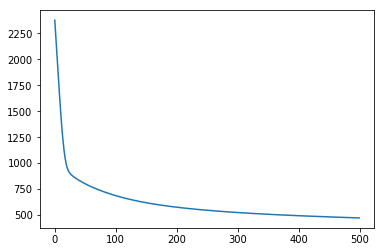

In [142]:
plt.plot(errs)
min(errs)

In [143]:
def ROC(X,Y,w1,b1,w2,b2):
    threshold = np.linspace(1000,0, 1001)
    threshold = threshold/1000
    tprs = []
    fprs = []
    for i in threshold:
        tprs.append(np.sum(np.multiply((sig(tanh(X@w1 + b1)@w2+b2)>i),Y))/np.sum(Y))
        fprs.append(np.sum(np.multiply((sig(tanh(X@w1 + b1)@w2+b2)>i),1 - Y))/np.sum(1 - Y))
    plt.plot(fprs,tprs)
    plt.plot([0,1],[0,1], c = 'black')
    plt.xlabel("False Positive Rate",fontsize = 14)
    plt.ylabel("True Positive Rate", fontsize = 14)
    plt.title("ROC", fontsize  = 20)
    leg = "AUC = "+str(round((np.sum(np.multiply(tprs[0:1000],np.diff(fprs)))+np.sum(np.multiply(tprs[1:1001],np.diff(fprs))))/2,4))
    plt.text(.58,0,leg, fontsize = 14)
    plt.show()

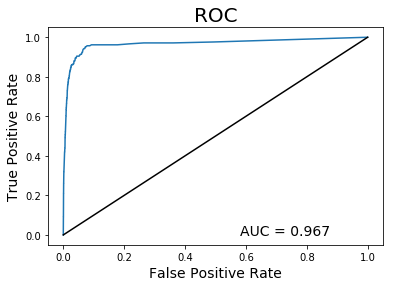

In [144]:
ROC(Xtest,Ytest,w1,b1,w2,b2)

Number of nodes is 70.